# **Credit Card Fraud Detection**

**Problem Statement:**

With the increasing prevalence of online transactions, ensuring the security of credit card
transactions is very important. The objective of this project is to develop a robust machine
learning model capable of accurately detecting fraudulent credit card transactions in real-time.
Utilizing a dataset containing transaction details such as transaction amount, merchant
category, cardholder information, transaction location, the aim is to build a predictive model
that can effectively differentiate between legitimate and fraudulent transactions. By employing
advanced machine learning algorithms and feature engineering techniques, the goal is to create
a system that enhances fraud detection capabilities, thereby minimizing financial losses for both
cardholders and financial institutions while maintaining a low false positive rate. Ultimately, this
project seeks to contribute to the development of proactive measures for securing credit card
transactions and safeguarding the financial interests of stakeholders in the digital economy.

In [ ]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print("Required library imported ")

Required library imported 


In [ ]:
# load dataset  url
credit_card =pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")
credit_card

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No


**DataSet Overview**

The dataset contains transaction details such as transaction amount, merchant category, location, cardholder demographics, and a fraud indicator.

**Data Attributes:**



*   **Transaction_ID:** Unique ID for each transaction.

*   **Card_Type:** Type of card (Visa, Mastercard, etc.).

*   **Merchant_Category:** Merchant category (Retail, Dining, etc.).

*   **Transaction_Amount:** Amount of money involved.

*   **Transaction_DateTime:** Date and time of transaction.
*   **Location:** City of the transaction.


*   **Region:** Region of the transaction.


*   **Cardholder_Age:** Age of the cardholder.


*   **Cardholder_Gender:** Gender of the cardholder.


*   **Cardholder_Monthly_Income:** Monthly income of the cardholder.

*   **Cardholder_Average_Spend:** Average amount spent.
*   **Credit_Limit:** Maximum credit limit.

*   **Device_Type:** Device used for the transaction.
*   **Day_of_Week:** Day of the transaction.

*   **Is_Fraudulent:** Fraud indicator (Yes/No).

# **Project Steps and Objectives:**

**1) Exploratory Data Analysis (EDA):**

In [ ]:
# view shape of datafrme
print("Number of Rows     :" ,credit_card.shape[0])
print("Number of Columns  :" ,credit_card.shape[1])

Number of Rows     : 5000
Number of Columns  : 15


In [ ]:
# view first 5 rows
credit_card.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
# view Last 5 rows
credit_card.tail()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No
4999,D501WH15,Visa,Healthcare,34672.0,2023-12-30 11:41:36,Jaipur,North,60.0,NaN,58261.0,39412.26,50000.0,Mobile,Saturday,No


In [ ]:
print(credit_card.duplicated().sum())

0


In [ ]:
# infomation about dataset
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
# describe dataset
credit_card.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,4994.0,74667.995995,43089.045623,25008.00,39742.5000,60922.000,98373.5000,199923.00
Cardholder_Age,4865.0,49.106680,18.398524,18.00,33.0000,49.000,65.0000,80.00
Cardholder_Monthly_Income,4686.0,137353.817542,69471.623020,35005.00,73485.0000,131833.000,189054.2500,299907.00
Cardholder_Average_Spend,4792.0,63058.343566,40056.989704,10282.41,33336.7425,49547.945,83732.3525,199898.29
Credit_Limit,4991.0,124654.377880,55668.246494,50000.00,100000.0000,100000.000,150000.0000,200000.00


**a) Analyze the distribution of categorical features such as Card_Type, Merchant_Category,Location, etc.**

In [ ]:
# Define categorical columns to analyze
categorical_columns = ['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week']
print(" Distribution Categorical value\n ")
for i in categorical_columns:
    print(i)
    print(credit_card[i].value_counts())
    print("\n")


 Distribution Categorical value
 
Card_Type
Card_Type
Visa                1979
Mastercard          1540
RuPay                947
American Express     517
Name: count, dtype: int64


Merchant_Category
Merchant_Category
Online Shopping    1019
Retail              959
Utility bill        521
Education           519
Entertainment       517
Healthcare          496
Dining              481
Transportation      466
Name: count, dtype: int64


Location
Location
Surat        431
Kochi        415
Bengaluru    410
Hyderabad    395
Mumbai       387
Chennai      387
Lucknow      379
Pune         376
Kolkata      373
Jaipur       373
Patna        371
Delhi        357
Ahmedabad    346
Name: count, dtype: int64


Region
Region
South    1607
West     1540
North    1109
East      744
Name: count, dtype: int64


Cardholder_Gender
Cardholder_Gender
Female    2489
Male      2422
Name: count, dtype: int64


Device_Type
Device_Type
Unknown                       1022
Mobile                        1012
Contactle

**b) Explore numerical features like Transaction_Amount, Cardholder_Age cardholder_Monthly_Income, and Cardholder_Average_Spend.**

In [ ]:
# Define numerical columns to explore
numerical_columns = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']
print(" Explore Numerical Features\n ")
for i in numerical_columns:
    print(i)
    print(credit_card[i].describe())
    print("\n")

 Explore Numerical Features
 
Transaction_Amount
count      4994.000000
mean      74667.995995
std       43089.045623
min       25008.000000
25%       39742.500000
50%       60922.000000
75%       98373.500000
max      199923.000000
Name: Transaction_Amount, dtype: float64


Cardholder_Age
count    4865.000000
mean       49.106680
std        18.398524
min        18.000000
25%        33.000000
50%        49.000000
75%        65.000000
max        80.000000
Name: Cardholder_Age, dtype: float64


Cardholder_Monthly_Income
count      4686.000000
mean     137353.817542
std       69471.623020
min       35005.000000
25%       73485.000000
50%      131833.000000
75%      189054.250000
max      299907.000000
Name: Cardholder_Monthly_Income, dtype: float64


Cardholder_Average_Spend
count      4792.000000
mean      63058.343566
std       40056.989704
min       10282.410000
25%       33336.742500
50%       49547.945000
75%       83732.352500
max      199898.290000
Name: Cardholder_Average_Spend, d

**Conduct bivariate and multivariate analysis to identify potential relationships between the features as well as with the target variable (Is_Fraudulent).**

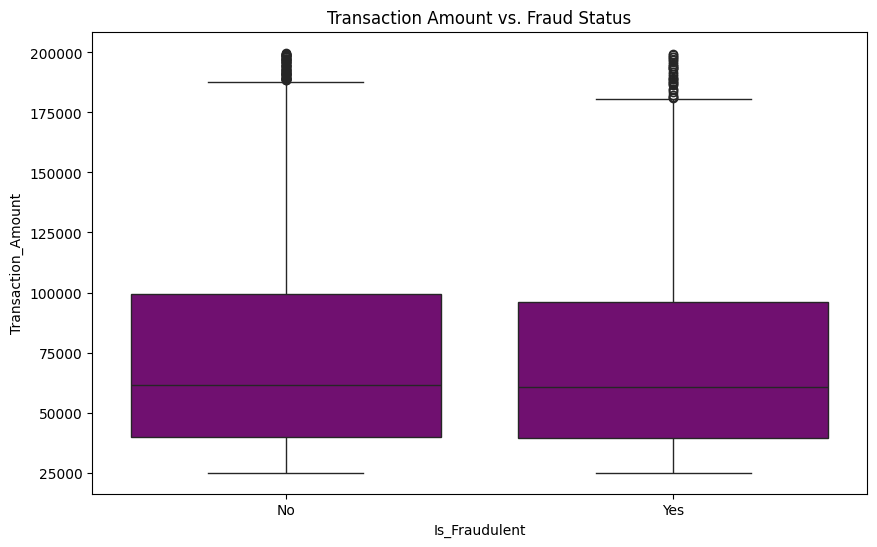

In [ ]:
# To identify potential relationships between the features as well as with the target variable (Is_Fraudulent).
# box: Transaction Amount vs. Fraud Status
# To compare transaction amounts for fraudulent and non-fraudulent transactions.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Fraudulent', y='Transaction_Amount', data=credit_card, color = 'purple')
plt.title('Transaction Amount vs. Fraud Status')
plt.xlabel('Is_Fraudulent')
plt.ylabel('Transaction_Amount')
plt.show()

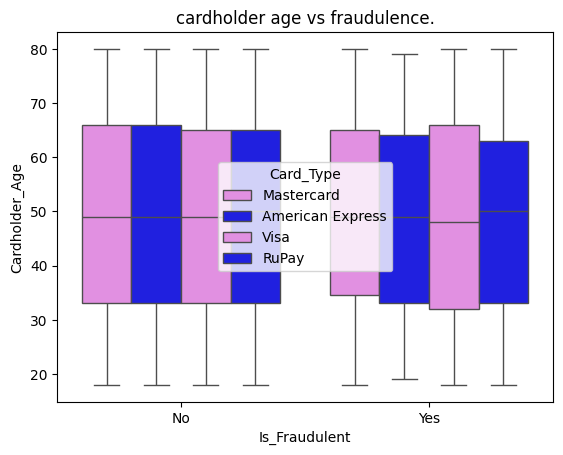

In [ ]:
# To observe how cardholder age correlates with fraudulence.
sns.boxplot(x=credit_card['Is_Fraudulent'],y= credit_card['Cardholder_Age'],hue=credit_card['Card_Type'],palette=['violet', 'blue'])
plt.title("cardholder age vs fraudulence.")
plt.xlabel('Is_Fraudulent')
plt.ylabel('Cardholder_Age')
plt.show()

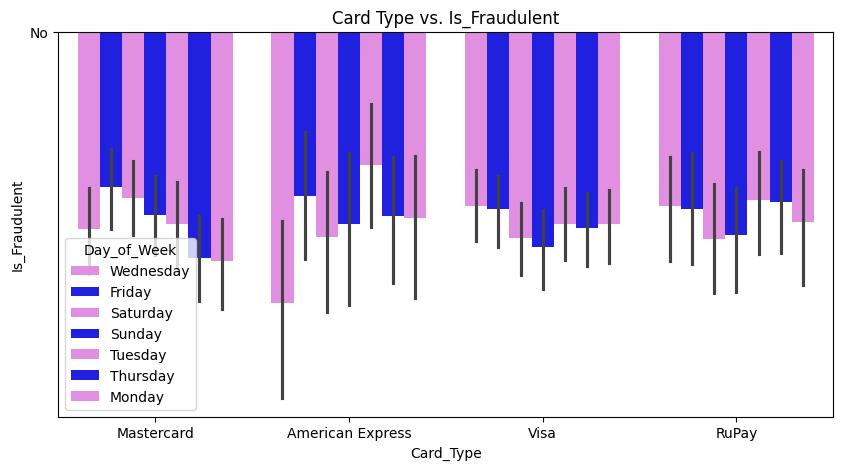

In [ ]:
#To show the count of fraudulent vs. non-fraudulent transactions for each card type.
plt.figure(figsize=(10,5))
sns.barplot(x=credit_card['Card_Type'],y = credit_card['Is_Fraudulent'],hue=credit_card['Day_of_Week'],palette=['violet','blue'])
plt.title("Card Type vs. Is_Fraudulent")
plt.xlabel('Card_Type')
plt.ylabel('Is_Fraudulent')
plt.show()

In [ ]:
# a) Correlation :
# Convert 'Is_Fraudulent' to numerical values
credit_card['Is_Fraudulent_Num'] = credit_card['Is_Fraudulent'].apply(lambda x: 1 if x == 'Yes' else 0)
numerical_columns = ['Transaction_Amount', 'Cardholder_Age',  'Cardholder_Monthly_Income',  'Cardholder_Average_Spend','Is_Fraudulent_Num']
# Compute correlation of numerical features with 'Is_Fraudulent_Num'
correlation_with_fraud = credit_card[numerical_columns].corr()['Is_Fraudulent_Num']
print("Correlation of Numerical Features with Fraudulent Transactions")
correlation_with_fraud

Correlation of Numerical Features with Fraudulent Transactions


,Is_Fraudulent_Num
Transaction_Amount,-0.019470
Cardholder_Age,-0.003061
Cardholder_Monthly_Income,-0.018481
Cardholder_Average_Spend,-0.013361
Is_Fraudulent_Num,1.000000


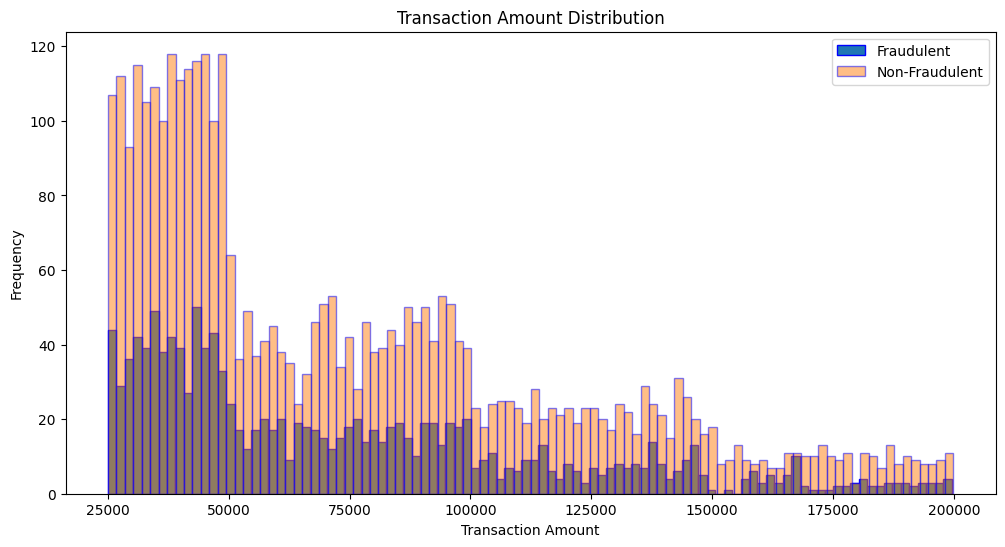

In [ ]:
# Separate the data into fraudulent and non-fraudulent transactions
fraudulent_transactions = credit_card[credit_card['Is_Fraudulent_Num'] == 1]
non_fraudulent_transactions = credit_card[credit_card['Is_Fraudulent_Num'] == 0]
plt.figure(figsize=(12, 6))
plt.hist(fraudulent_transactions['Transaction_Amount'], bins=100 ,edgecolor='blue' , label='Fraudulent')
plt.hist(non_fraudulent_transactions['Transaction_Amount'], bins=100,edgecolor='blue', alpha= 0.5, label='Non-Fraudulent')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.show()

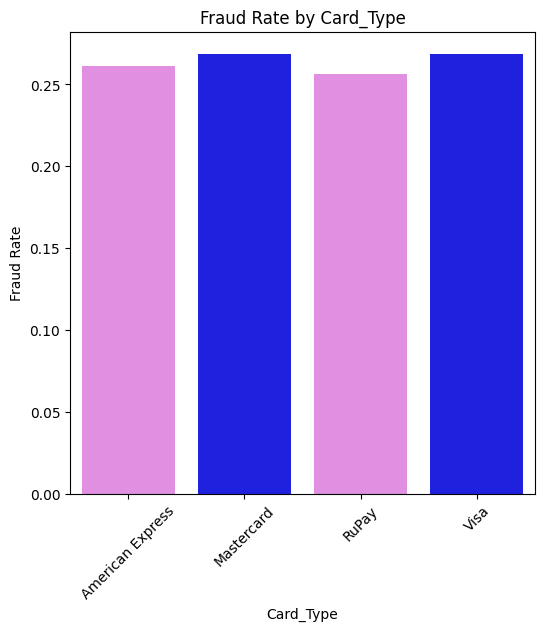

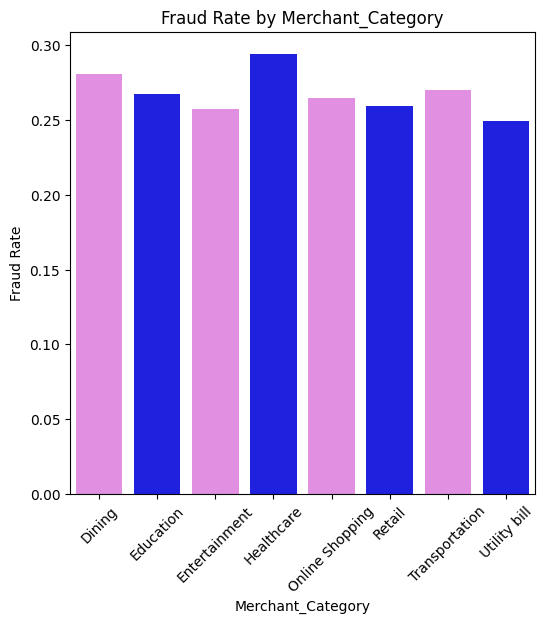

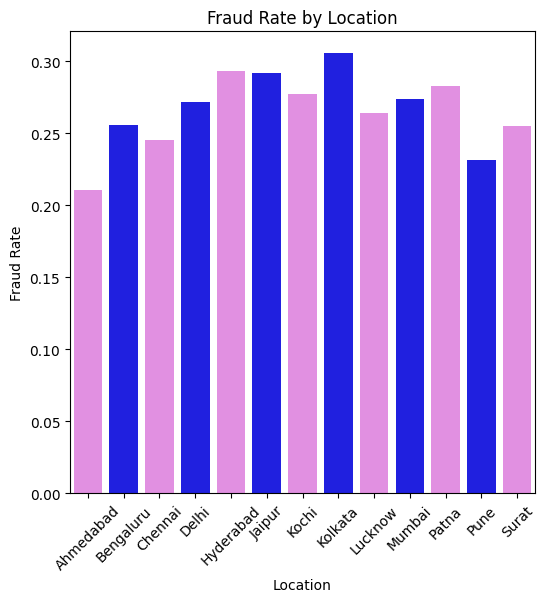

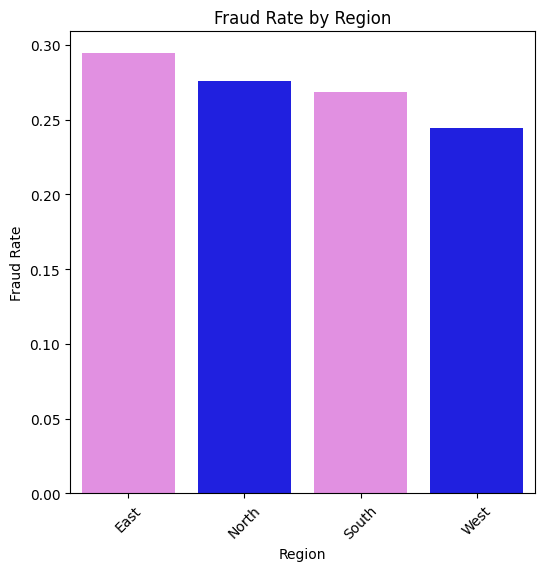

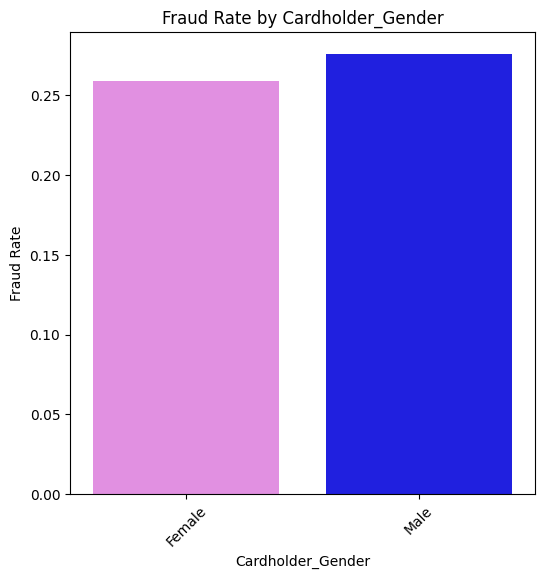

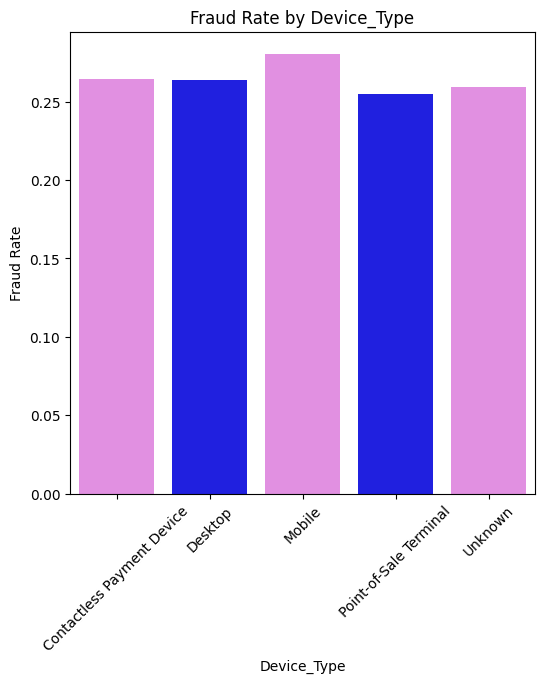

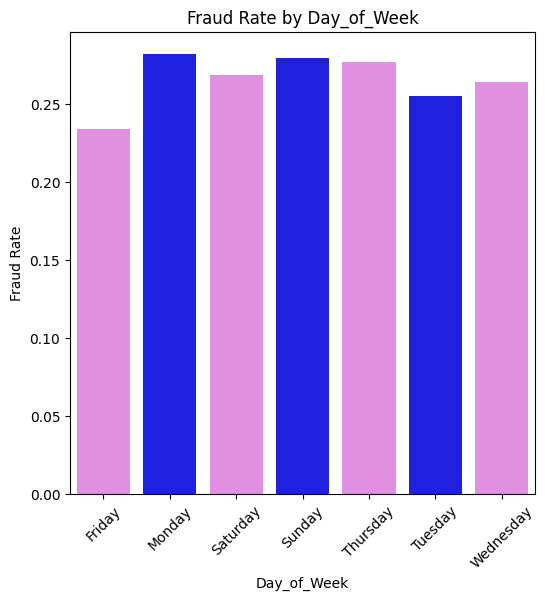

In [ ]:
# Grouping by Categorical Features
# Calculate the mean of 'Is_Fraudulent_Num' for each Card_Type
for i in categorical_columns:
  fraud_by_card_type = credit_card.groupby(i, as_index=False)['Is_Fraudulent_Num'].mean()
  plt.figure(figsize=(6, 6))
  sns.barplot(x=i,y='Is_Fraudulent_Num', data=fraud_by_card_type, palette=['violet','blue'])
  plt.xlabel(f"{i}")
  plt.ylabel("Fraud Rate")
  plt.title(f"Fraud Rate by {i}")
  plt.xticks(rotation=45)
  plt.show()


# **2) Data Preprocessing - Data Cleaning:**

In [ ]:
#a) Handle missing values if any, using appropriate techniques such as KNNImputer; mean or
#median imputation for numerical features, and mode imputation for categorical features.
print("Card type          :",credit_card['Card_Type'].unique())
print('Merchant_Category  :',credit_card[ 'Merchant_Category'].unique())
print('Location           :',credit_card['Location'].unique())
print('Region             :',credit_card['Region'].unique())
print('Device_Type        :',credit_card['Device_Type'].unique())
print('Day_of_Week        :',credit_card['Day_of_Week'].unique())

Card type          : ['Mastercard' 'American Express' 'Visa' 'RuPay' nan]
Merchant_Category  : ['Utility bill' 'Retail' 'Transportation' 'Online Shopping'
 'Entertainment' 'Education' 'Dining' 'Healthcare' nan]
Location           : ['Patna' 'Surat' 'Lucknow' 'Mumbai' 'Kolkata' 'Bengaluru' 'Jaipur'
 'Hyderabad' 'Kochi' 'Chennai' 'Pune' 'Ahmedabad' 'Delhi']
Region             : ['East' 'West' 'North' 'South']
Device_Type        : ['Unknown' 'Desktop' 'Mobile' 'Point-of-Sale Terminal'
 'Contactless Payment Device' nan]
Day_of_Week        : ['Wednesday' 'Friday' 'Saturday' 'Sunday' 'Tuesday' 'Thursday' 'Monday']


In [ ]:
credit_card.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
# handling missing values in categorical columns with mode
credit_card['Card_Type'].fillna(credit_card['Card_Type'].mode()[0],inplace=True)
credit_card['Merchant_Category'].fillna(credit_card['Merchant_Category'].mode()[0],inplace=True)
credit_card['Device_Type'].fillna(credit_card['Device_Type'].mode()[0],inplace=True)
credit_card['Cardholder_Gender'].fillna(credit_card['Cardholder_Gender'].mode()[0],inplace=True)
print("After Handling missing values")
print("Card type          :",credit_card['Card_Type'].unique())
print('Merchant_Category  :',credit_card[ 'Merchant_Category'].unique())
print('Location           :',credit_card['Location'].unique())
print('Region             :',credit_card['Region'].unique())
print('Device_Type        :',credit_card['Device_Type'].unique())
print('Day_of_Week        :',credit_card['Day_of_Week'].unique())
print('Cardholder_Gender  :',credit_card['Cardholder_Gender'].unique())

After Handling missing values
Card type          : ['Mastercard' 'American Express' 'Visa' 'RuPay']
Merchant_Category  : ['Utility bill' 'Retail' 'Transportation' 'Online Shopping'
 'Entertainment' 'Education' 'Dining' 'Healthcare']
Location           : ['Patna' 'Surat' 'Lucknow' 'Mumbai' 'Kolkata' 'Bengaluru' 'Jaipur'
 'Hyderabad' 'Kochi' 'Chennai' 'Pune' 'Ahmedabad' 'Delhi']
Region             : ['East' 'West' 'North' 'South']
Device_Type        : ['Unknown' 'Desktop' 'Mobile' 'Point-of-Sale Terminal'
 'Contactless Payment Device']
Day_of_Week        : ['Wednesday' 'Friday' 'Saturday' 'Sunday' 'Tuesday' 'Thursday' 'Monday']
Cardholder_Gender  : ['Female' 'Male']


In [ ]:
n = ['Transaction_Amount','Cardholder_Age','Cardholder_Monthly_Income','Cardholder_Average_Spend']
print("Before handling missing values")
for i in n:
  print(f"{i} :" ,credit_card[i].isnull().sum())

Before handling missing values
Transaction_Amount : 6
Cardholder_Age : 135
Cardholder_Monthly_Income : 314
Cardholder_Average_Spend : 208


In [ ]:
# handling missing values in numerical columns with mean
credit_card['Transaction_Amount'].fillna(credit_card['Transaction_Amount'].median(),inplace=True)
credit_card['Cardholder_Average_Spend'].fillna(credit_card['Cardholder_Average_Spend'].mean(),inplace=True)
credit_card['Cardholder_Age'].fillna(credit_card['Cardholder_Age'].mean(),inplace=True)
credit_card['Cardholder_Monthly_Income'].fillna(credit_card['Cardholder_Monthly_Income'].median(),inplace=True)
credit_card['Credit_Limit'].fillna(credit_card['Credit_Limit'].mode()[0],inplace=True)
n = ['Transaction_Amount','Cardholder_Age','Cardholder_Monthly_Income','Cardholder_Average_Spend','Credit_Limit']
print("After handling missing values")
for i in n:
  print(f"{i} :" ,credit_card[i].isnull().sum())

After handling missing values
Transaction_Amount : 0
Cardholder_Age : 0
Cardholder_Monthly_Income : 0
Cardholder_Average_Spend : 0
Credit_Limit : 0


In [ ]:
credit_card.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


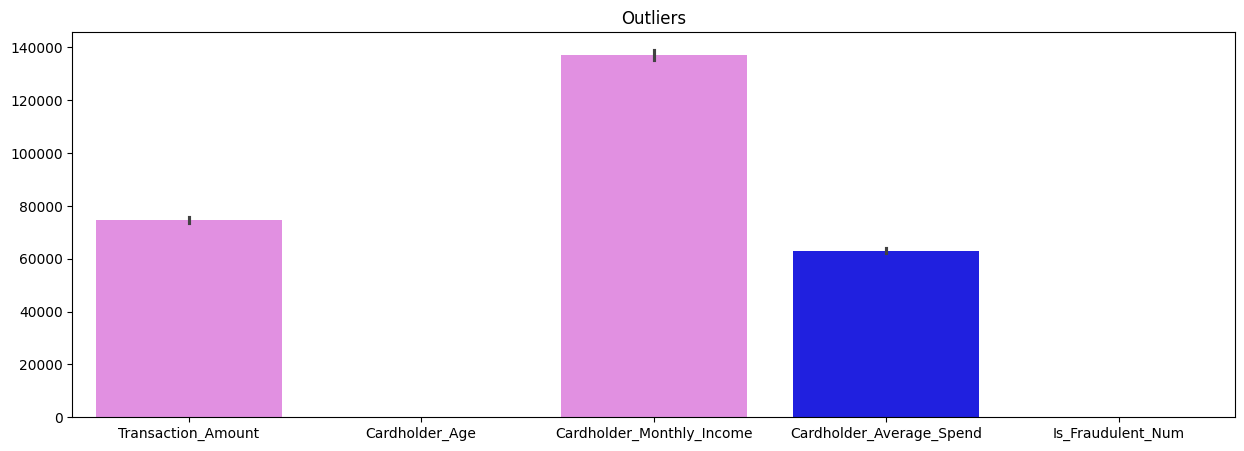

In [ ]:
# Check for outliers
plt.figure(figsize=(15,5))
sns.barplot(data=credit_card[numerical_columns],palette=['violet','blue'])
plt.title("Outliers")
plt.show()

In [ ]:
# preserve original data
card = credit_card.copy()
# Remove Outlier in IQR Method
outlier_column = ['Transaction_Amount' , 'Cardholder_Average_Spend']
for i in outlier_column:
  Q1 = card[i].quantile(0.25)
  Q3 = card[i].quantile(0.75)
  IQR = Q3 - Q1
  Lower_bound = Q1 - 1.5 * IQR
  Upper_bound = Q3 + 1.5 * IQR
  # Remove Outlier
  card = card[(card[i]>= Lower_bound) & (card[i] <= Upper_bound) ]
  print(f"column {i} outlier Removed ")

column Transaction_Amount outlier Removed 
column Cardholder_Average_Spend outlier Removed 


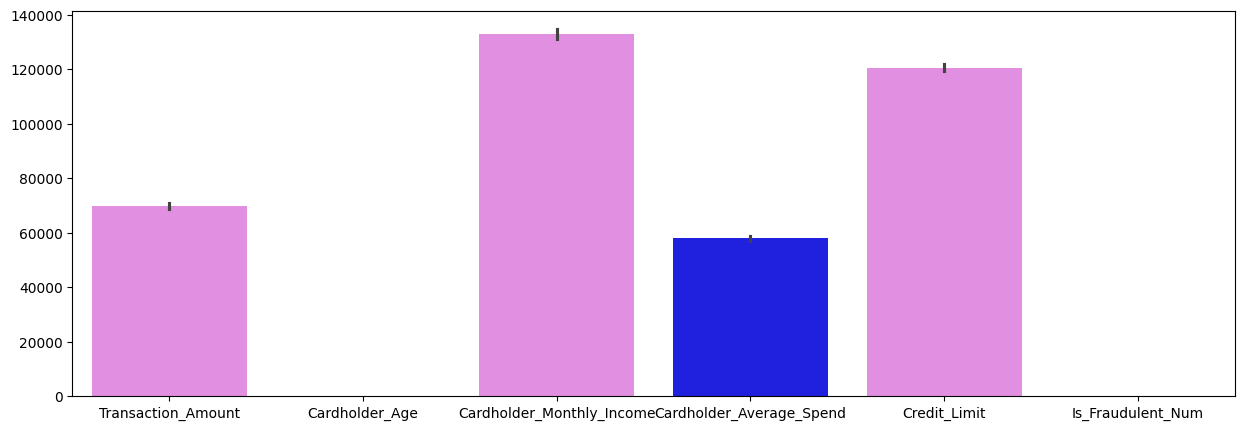

In [ ]:
# After Remove outliers  IQR METHOD
plt.figure(figsize=(15,5))
sns.barplot(data=card,palette=['violet','blue'])
plt.show()

In [ ]:
# Calculate skewness of numerical columns
numerical_columns =['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']
skewness = credit_card[numerical_columns].skew()
skewness

,0
Transaction_Amount,0.969995
Cardholder_Age,-0.009149
Cardholder_Monthly_Income,0.457649
Cardholder_Average_Spend,1.179836


In [ ]:
# Apply log transformation to highly skewed features
# when the data contains values close to zero or very small value we need to apply the regular logarithm (np.log(x)) but our data values (0.968481) and (1.155050) so we use (np.log1p)
Transaction_Amount_log = np.log1p(credit_card['Transaction_Amount']) .skew()
Cardholder_Average_Spend_log = np.log1p(credit_card['Cardholder_Average_Spend']).skew()
# Apply square root transformation to mildly skewed feature
# 0.428367 is not highly skewed, so square root transformation is sufficient for this.
Cardholder_Monthly_Income_sqrt = np.sqrt(credit_card['Cardholder_Monthly_Income']).skew()
print("Transaction amount skew :",Transaction_Amount_log)
print("Cardholder Average Spend skew :",Cardholder_Average_Spend_log )
print("Card Holder Monthly Income skew ",Cardholder_Monthly_Income_sqrt)

Transaction amount skew : 0.20391534655669194
Cardholder Average Spend skew : -0.025184160369895573
Card Holder Monthly Income skew  0.014969898683967437


# **3) Feature Engineering:**

In [ ]:
# a) Identify the categorical features in the dataset.
# Exclude Transaction_ID from feature engineering and not encode it as numerical data. leading to overfitting.
# Instead, focus on meaningful categorical features like Card_Type, Merchant_Category, Device_Type, etc.
Categorical_Features = credit_card.select_dtypes(include=['object']).columns.drop('Transaction_ID')
Categorical_Features

Index(['Card_Type', 'Merchant_Category', 'Transaction_DateTime', 'Location',
       'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week',
       'Is_Fraudulent'],
      dtype='object')

In [ ]:
# b) Encode categorical features to numerical using techniques like one-hot encoding or
# Label encoding techniques to prepare the data for machine learning algorithms.
cat_features = ['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Device_Type','Day_of_Week', 'Cardholder_Gender']
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
for i in cat_features:
  credit_card[i] = Label_encoder.fit_transform(credit_card[i])
credit_card

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Is_Fraudulent_Num
0,W963UK57,1,7,27214.0,2020-01-01 09:43:17,10,0,23.00000,0,94632.0,36369.65,100000.0,4,6,No,0
1,V606KV56,0,5,83956.0,2020-01-03 16:26:13,12,3,49.00000,1,148118.0,89179.12,150000.0,1,0,No,0
2,R531NU70,3,6,193280.0,2020-01-04 03:40:49,10,0,49.10668,1,210921.0,106668.60,200000.0,1,2,No,0
3,T783GF79,2,4,167381.0,2020-01-04 14:56:24,12,3,52.00000,0,148070.0,173155.52,200000.0,1,2,Yes,1
4,K256ZN73,2,5,81170.0,2020-01-04 17:26:47,8,1,37.00000,0,174470.0,52713.09,200000.0,2,2,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,2,1,36508.0,2023-12-29 09:22:23,3,1,33.00000,0,63015.0,34192.55,50000.0,0,0,Yes,1
4996,J752EG45,0,4,42920.0,2023-12-29 19:59:13,2,2,49.10668,0,131833.0,19680.39,100000.0,0,0,No,0
4997,S458OS59,3,3,33788.0,2023-12-30 07:06:38,11,3,56.00000,1,60868.0,33876.96,50000.0,1,2,No,0
4998,E863PD98,2,2,38679.0,2023-12-30 07:50:02,2,2,60.00000,1,66948.0,32988.22,50000.0,1,2,No,0


In [ ]:
# first we need to Convert Transaction_DateTime column into datetime format
credit_card['Transaction_DateTime'] = pd.to_datetime(credit_card['Transaction_DateTime'])
# Extract features  from Transaction_DateTime column for ex: hour,day, month
credit_card['Transaction_Hour'] = credit_card['Transaction_DateTime'].dt.hour
credit_card['Transaction_Day'] = credit_card['Transaction_DateTime'].dt.day
credit_card['Transaction_Month'] = credit_card['Transaction_DateTime'].dt.month
credit_card['Transaction_Weekday'] = credit_card['Transaction_DateTime'].dt.weekday
credit_card['Is_Weekend'] = credit_card['Transaction_Weekday'].apply(lambda x: 1 if x >= 5 else 0)
credit_card

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,...,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Is_Fraudulent_Num,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Weekday,Is_Weekend
0,W963UK57,1,7,27214.0,2020-01-01 09:43:17,10,0,23.00000,0,94632.0,...,100000.0,4,6,No,0,9,1,1,2,0
1,V606KV56,0,5,83956.0,2020-01-03 16:26:13,12,3,49.00000,1,148118.0,...,150000.0,1,0,No,0,16,3,1,4,0
2,R531NU70,3,6,193280.0,2020-01-04 03:40:49,10,0,49.10668,1,210921.0,...,200000.0,1,2,No,0,3,4,1,5,1
3,T783GF79,2,4,167381.0,2020-01-04 14:56:24,12,3,52.00000,0,148070.0,...,200000.0,1,2,Yes,1,14,4,1,5,1
4,K256ZN73,2,5,81170.0,2020-01-04 17:26:47,8,1,37.00000,0,174470.0,...,200000.0,2,2,No,0,17,4,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,2,1,36508.0,2023-12-29 09:22:23,3,1,33.00000,0,63015.0,...,50000.0,0,0,Yes,1,9,29,12,4,0
4996,J752EG45,0,4,42920.0,2023-12-29 19:59:13,2,2,49.10668,0,131833.0,...,100000.0,0,0,No,0,19,29,12,4,0
4997,S458OS59,3,3,33788.0,2023-12-30 07:06:38,11,3,56.00000,1,60868.0,...,50000.0,1,2,No,0,7,30,12,5,1
4998,E863PD98,2,2,38679.0,2023-12-30 07:50:02,2,2,60.00000,1,66948.0,...,50000.0,1,2,No,0,7,30,12,5,1


# **4) Feature Selection:**

In [ ]:
credit_card.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'Location', 'Region',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent', 'Is_Fraudulent_Num', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Weekday',
       'Is_Weekend'],
      dtype='object')

In [ ]:
# Train a Random Forest to determine which features contribute most.
from sklearn.ensemble import RandomForestClassifier

# Define feature columns and target column
X = credit_card.drop(columns =['Transaction_ID','Transaction_DateTime','Is_Fraudulent', 'Is_Fraudulent_Num'] )
y = credit_card['Is_Fraudulent_Num']
# train random forest model
model = RandomForestClassifier(n_estimators= 100 , random_state = 42)
model.fit(X,y)
# get important features
feature_importance = pd.Series(model.feature_importances_, index= X.columns ).sort_values(ascending=False)
feature_importance

,0
Cardholder_Average_Spend,0.113680
Transaction_Amount,0.113269
Cardholder_Monthly_Income,0.110260
Cardholder_Age,0.096434
Transaction_Day,0.083008
Transaction_Hour,0.077856
Transaction_Month,0.064844
Merchant_Category,0.056747
Location,0.056680
Device_Type,0.042317


In [ ]:
# Drop Redundant and Irrelevant Features
# List of features to drop
drop_features = ['Transaction_ID','Day_of_Week', 'Transaction_Weekday', 'Card_Type','Region','Credit_Limit', 'Cardholder_Gender', 'Is_Weekend' ,'Is_Fraudulent','Transaction_DateTime']
# Drop features
creditcard_clean = credit_card.drop(columns=drop_features)

# Display remaining features
print("Remaining Features:\n", creditcard_clean.columns)

Remaining Features:
 Index(['Merchant_Category', 'Transaction_Amount', 'Location', 'Cardholder_Age',
       'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Device_Type',
       'Is_Fraudulent_Num', 'Transaction_Hour', 'Transaction_Day',
       'Transaction_Month'],
      dtype='object')


In [ ]:
# Compare the distribution in fradulent and Non_fradulent features
from sklearn.utils import resample
creditcard_clean_majority = creditcard_clean[creditcard_clean.Is_Fraudulent_Num == 0]
creditcard_clean_minority = creditcard_clean[creditcard_clean.Is_Fraudulent_Num == 1]
print(creditcard_clean_majority.shape)
print(creditcard_clean_minority.shape)

(3668, 11)
(1332, 11)


In [ ]:
# avoid biasing , to balnce the dataset by resample
creditcard_clean_minority_upsampled = resample(creditcard_clean,n_samples = 5000 , random_state =48)
mydata = pd.concat([creditcard_clean_majority[:0],creditcard_clean_minority_upsampled])
print(creditcard_clean_minority_upsampled.shape,mydata.shape)

(5000, 11) (5000, 11)


In [ ]:
mydata['Is_Fraudulent_Num'].value_counts()

,count
Is_Fraudulent_Num,
0,3702
1,1298


# **5) Split data into training and testing:**

In [ ]:
# Define features (excluding target)
X = mydata.drop(columns=['Is_Fraudulent_Num'])
# Define a target
y = mydata['Is_Fraudulent_Num']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.02 , random_state=42,stratify=y )
# Check the shape of training and testing sets
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (4900, 10) (4900,)
Testing Data Shape: (100, 10) (100,)


# **6) Feature Scaling:**

In [ ]:
# Standardization (Z-score Normalization):
from sklearn.preprocessing import StandardScaler
# initialize standard scalar
scalar = StandardScaler()
num_features = creditcard_clean.select_dtypes(include=['float64']).columns
# fit and transform numerical features
X_train[num_features] = scalar.fit_transform(X_train[num_features])
X_test[num_features] = scalar.transform(X_test[num_features])

# **7) Build the Machine Learning Model:**

In [ ]:
# a) Import the Necessary Modules and Libraries for building and evaluating machine learning models:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score,recall_score

In [ ]:
# b) Define a list or dictionary of classifiers to be evaluated; including Logistic Regression,
# Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM.
# Then, compute the accuracy score and F1-score for each classifier.
# List of classifiers to be evaluated
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC()
}
# Evaluate each classifier
results = {}
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'F1-score': f1}
# Display results
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}, F1-score = {metrics['F1-score']:.4f}")

Logistic Regression: Accuracy = 0.7400, F1-score = 0.0000
Naive Bayes: Accuracy = 0.7400, F1-score = 0.0000
Decision Tree: Accuracy = 0.8000, F1-score = 0.6154
Random Forest: Accuracy = 0.8700, F1-score = 0.6667
K-Nearest Neighbors: Accuracy = 0.6900, F1-score = 0.3404
SVM: Accuracy = 0.7400, F1-score = 0.0000


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make Predictions on the Test Set:
y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.86
Precision: 0.9285714285714286
Recall: 0.5
F1-Score: 0.65
Confusion Matrix:
[[73  1]
 [13 13]]


# **Conclusion**

This project aimed to detect fraudulent credit card transactions using various machine learning models. The dataset was imbalanced, requiring resampling techniques to improve model performance. After evaluating multiple models, Random Forest demonstrated the best overall performance with an accuracy of 87% and an F1-score of 0.67.



*   **Data Preprocessing:** Label encoding and resampling (upsampling the minority class) improved model performance.

*   **Model Evaluation:** Random Forest outperformed other models in fraud detection, balancing precision and recall.
*   **Challenges:** High class imbalance affected logistic regression, SVM, and Naïve Bayes, leading to low F1-scores.

# **Future Enhancements:**



*   **Advanced Resampling & Feature Engineering:** Use SMOTE and behavior-based features to enhance fraud detection.
*   **Real-Time & Adaptive Detection:** Deploy models with continuous learning for improved accuracy.

